---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_line.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## 📈 Scatter plots.

In [1]:
# installing the required roux subpackage
# !pip install roux[viz]
# loading requirements
import matplotlib.pyplot as plt
## for saving plots
from roux.viz.io import to_plot

### Correlation plot
#### Demo data

In [2]:
import seaborn as sns
df1=sns.load_dataset('iris')
df1.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


{'rr': 0.8332101161199846, 'ci': 0.017906001714415365, 'ci_type': 'max', 'n': 150, 'method': 'spearman', 'r': 0.8342887759080051, 'P': 4.1894466773905186e-40}


'/home/rdandage/Documents/work/roux/examples/outputs/roux_viz_scatter/plot_scatter.png'

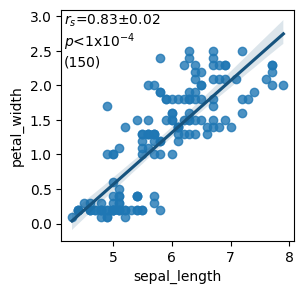

In [4]:
# plot
_,ax=plt.subplots(figsize=[3,3])
from roux.viz.scatter import plot_scatter
ax=plot_scatter(
    df1.sort_values('sepal_length'),
    x='sepal_length',
    y='petal_width',
    hollow=False,
    stat_kws=dict(resample=True,),
    ax=ax,
    )
print(ax.stats)
to_plot('./outputs/roux_viz_scatter/plot_scatter.png')

### Volcano plot
#### Demo data

In [17]:
import pandas as pd

In [18]:
data=(
    pd.DataFrame({'log fold change': {0: -2.1428593257362047, 1: -4.075630647192074, 2: 3.697479762024543, 3: -2.5210113863001484, 4: -2.5210113863001484, 5: -1.47059134663757, 6: -6.848738705615859, 7: 2.3529367514487878, 8: 8.361337544700318, 9: 5.168066407076445, 10: 6.470584294259078, 11: 3.613440093806034, 12: 2.016802761899473, 13: -3.865547344497412, 14: -5.168068757869282, 15: -1.0924392860736265, 16: -0.9663885992189803, 17: -0.7563052965243058, 18: -0.6722726806842889, 19: -0.0420192464110478, 20: 0.7983174905568617, 21: 0.7562994195422261, 22: 0.8823501063968786, 23: 0.8823501063968786, 24: 1.092433409091547, 25: 1.3865528538154743, 26: 1.6386507013355305, 27: 2.058820832914109, 28: 2.7310888120127377, 29: -2.0588267098961817}, 'p-value': {0: 0.00014633671163253806, 1: 8.001414601426181e-07, 2: 1.3221014234209027e-05, 3: 7.076272236596726e-24, 4: 4.2370618618950076e-08, 5: 6.258044397342256e-16, 6: 0, 7: 1.7454782620698482e-22, 8: 1.6546718649790746e-12, 9: 3.4401489493288306e-14, 10: 6.744072443972276e-10, 11: 7.707724763254205e-10, 12: 0.0007267847628064542, 13: 4.35178371686176e-13, 14: 4.9471037429473035e-17, 15: 2.3167972202723306e-10, 16: 9.442694382650812e-08, 17: 3.848609469311497e-05, 18: 0.009193765785564318, 19: 0.08903653442013382, 20: 0.013724855578607713, 21: 0.00012803892481889009, 22: 9.442694382650812e-08, 23: 3.9527915103845236e-10, 24: 4.35178371686176e-13, 25: 4.791049937389934e-16, 26: 1.5354411075099387e-18, 27: 0, 28: 4.2370618618950076e-08, 29: 2.6620257419958746e-06}})
    .assign(
        id=lambda df: range(len(df)),
        category=lambda df: pd.qcut(df['p-value'],3, labels=['low','med','high']),
        )
)
data.head(1)

,log fold change,p-value,id,category
0,-2.142859,0.000146,0,high


#### Plot

info:root:2 zeros will be replaced
/Users/rohandandage/Documents/work/code/roux/roux/stat/transform.py:70: RuntimeWarning: divide by zero encountered in log10
  return -1 * (np.log10(x))
error:root:install adjustText to repel the labels.


[-7.609242518131668, -0.0, -0.0] [2.0, 2.0, 24.25518365311741]
[9.121841357216127, 0.0, 0.0] [2.0, 2.0, 24.25518365311741]


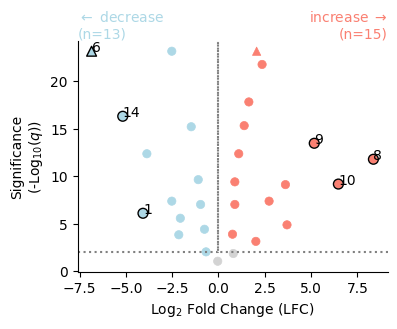

In [19]:
from roux.viz.scatter import plot_volcano
ax=plot_volcano(
    data,
    colx='log fold change',
    coly='p-value',
    colindex='id',
    collabel='id',
    
    show_labels=3, # show top n 
    
    text_increase='n',
    text_decrease='n',
    line_pvalue=0.01,
    palette=['salmon','lightblue','lightgray',], # increase, decrease, ns
    )
# to_plot('./outputs/roux_viz_scatter/plot_volcano.png')

#### With highlighted points

info:root:2 zeros will be replaced
/Users/rohandandage/Documents/work/code/roux/roux/stat/transform.py:70: RuntimeWarning: divide by zero encountered in log10
  return -1 * (np.log10(x))
info:root:Mapping between the categories and the colors of the outlines: {'low': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'med': (1.0, 0.4980392156862745, 0.054901960784313725), 'high': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)}.
/Users/rohandandage/Documents/work/code/roux/roux/viz/annot.py:369: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cat, df_ in data.groupby(column_outlines):


[-7.609242518131668, -0.0, -0.0] [1.0, 1.0, 24.25518365311741]
[9.121841357216127, 0.0, 0.0] [1.0, 1.0, 24.25518365311741]


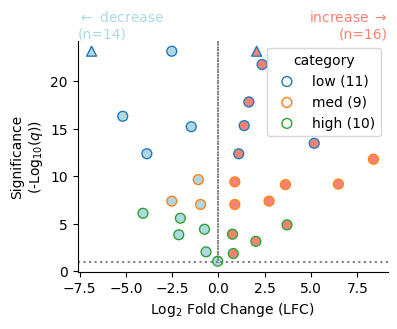

In [20]:
ax=plot_volcano(
    data=data,
    colx='log fold change',
    coly='p-value',
    colindex='id',
    collabel='id',
    
    show_outlines='category',
    outline_colors=sns.color_palette()[:3],
    
    text_increase='n',
    text_decrease='n',
    palette=['salmon','lightblue','lightgray',], # increase, decrease, ns
    legend=True,
    )
_=to_plot('./outputs/roux_viz_scatter/plot_volcano_marked.png')

#### Out-of-bounds

In [21]:
## demo data
import numpy as np
data.loc[0,'log fold change']=np.inf
data.loc[1,'log fold change']=-np.inf

info:root:2 zeros will be replaced
/Users/rohandandage/Documents/work/code/roux/roux/stat/transform.py:70: RuntimeWarning: divide by zero encountered in log10
  return -1 * (np.log10(x))


[-7.609242518131668, -0.0, -0.0] [1.0, 1.0, 24.25518365311741]
[9.121841357216127, 0.0, 0.0] [1.0, 1.0, 24.25518365311741]


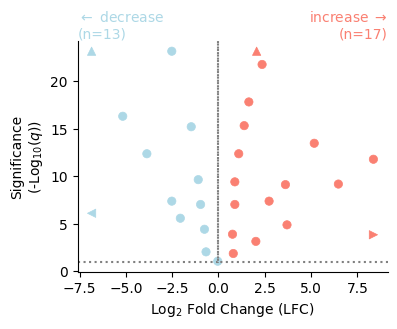

In [22]:
# %run ../roux/viz/scatter.py
ax=plot_volcano(
    data=data,
    colx='log fold change',
    coly='p-value',
    colindex='id',
    collabel='id',
    outline_colors=sns.color_palette()[:3],
    text_increase='n',
    text_decrease='n',
    palette=['salmon','lightblue','lightgray',], # increase, decrease, ns
    # legend=True,
    )
_=to_plot('./outputs/roux_viz_scatter/plot_volcano_out_of_bounds.png')

### Rank plot

In [23]:
## demo data
import numpy as np
import pandas as pd
df = (
    pd.DataFrame(np.random.randint(0,100,size=(301, 1)), columns=['value'])
    .assign(id=lambda df: range(len(df)))
)
df.head(1)

,value,id
0,83,0


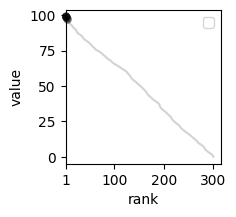

In [24]:
# %run ../roux/viz/scatter.py
from roux.viz.scatter import plot_ranks
_=plot_ranks(
    df,
    col='value',
    colid='id',
    ranks_on='x',
    ascending=False,
    line=True,
    show_topn=5,
)

### Documentation
[`roux.viz.scatter`](https://github.com/rraadd88/roux#module-rouxvizscatter)